In [1]:
import pandas as pd
import numpy as np
import regex as re

In [2]:
df=pd.read_csv('Car details v3.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import random
import os

In [5]:
df['name'].value_counts()


Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64

In [6]:
##df.groupby('name')(['name']).name(count)


In [7]:
df[['name']]

,name
0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel
4,Maruti Swift VXI BSIII
...,...
8123,Hyundai i20 Magna
8124,Hyundai Verna CRDi SX
8125,Maruti Swift Dzire ZDi
8126,Tata Indigo CR4


In [8]:
df.name.unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [9]:
df['name'].str[:6].unique()


array(['Maruti', 'Skoda ', 'Honda ', 'Hyunda', 'Toyota', 'Ford F',
       'Renaul', 'Mahind', 'Tata T', 'Chevro', 'Fiat P', 'Datsun',
       'Tata S', 'Jeep C', 'Merced', 'Mitsub', 'Audi A', 'Tata M',
       'Volksw', 'Tata I', 'Ford E', 'BMW X1', 'Nissan', 'Audi Q',
       'Lexus ', 'Jaguar', 'Jeep W', 'Land R', 'BMW 5 ', 'BMW X4',
       'MG Hec', 'Volvo ', 'Tata N', 'BMW 3 ', 'Daewoo', 'Tata Z',
       'Tata H', 'Kia Se', 'Tata V', 'Ford C', 'Tata A', 'Tata B',
       'Fiat G', 'Fiat L', 'Ford A', 'BMW X6', 'BMW 6 ', 'Force ',
       'Ford I', 'Tata X', 'BMW 7 ', 'BMW X7', 'Tata E', 'Ambass',
       'Fiat A', 'Ashok ', 'Isuzu ', 'Opel A', 'Tata W', 'BMW X3',
       'BMW X5', 'Peugeo'], dtype=object)

In [10]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [11]:
df['fuel'].replace({'Diesel':0,'Petrol':1, 'LPG':2, 'CNG':3}, inplace=True)

In [12]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,0,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [13]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [14]:
df['owner'].replace({'First Owner':1, 'Second Owner':2, 'Third Owner':3,
       'Fourth & Above Owner':4, 'Test Drive Car':0},inplace=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,0,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [15]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [16]:
df['transmission'].replace({'Manual':1, 'Automatic':2},inplace=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,Individual,1,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,Individual,1,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,Individual,1,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,Individual,1,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,Individual,1,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,Individual,1,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,Individual,1,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,Individual,1,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,0,Individual,1,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [17]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [18]:
df['seller_type'].replace({'Individual':1, 'Dealer':2, 'Trustmark Dealer':3},inplace=True)
df


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,1,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,1,1,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,1,1,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,1,1,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,1,1,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,1,1,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,1,1,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,1,1,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,0,1,1,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [19]:
df['mileage']=df['mileage'].str[:5]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,1,1,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,1,1,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,1,1,3,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,1,1,1,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,1,1,1,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,1,1,1,18.5,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,1,1,4,16.8,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,1,1,1,19.3,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,0,1,1,1,23.57,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [20]:
df['max_power']=df['max_power'].str[:-4]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,1,1,23.4,1248 CC,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,1,1,2,21.14,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,1,1,3,17.7,1497 CC,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,1,1,1,23.0,1396 CC,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,1,1,1,16.1,1298 CC,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,1,1,1,18.5,1197 CC,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,1,1,4,16.8,1493 CC,110,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,1,1,1,19.3,1248 CC,73.9,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,0,1,1,1,23.57,1396 CC,70,140Nm@ 1800-3000rpm,5.0


In [21]:
df['engine']=df['engine'].str[:4]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,1,1,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,1,1,2,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,1,1,3,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,1,1,1,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,1,1,1,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,1,1,1,18.5,1197,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,1,1,4,16.8,1493,110,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,1,1,1,19.3,1248,73.9,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,0,1,1,1,23.57,1396,70,140Nm@ 1800-3000rpm,5.0


In [22]:
df.name.str.split(pat=' ',expand=True)
##df.area_type.str.split(pat='-',expand=True)


,0,1,2,3,4,5,6,7,8,9
0,Maruti,Swift,Dzire,VDI,None,None,None,None,None,None
1,Skoda,Rapid,1.5,TDI,Ambition,None,None,None,None,None
2,Honda,City,2017-2020,EXi,None,None,None,None,None,None
3,Hyundai,i20,Sportz,Diesel,None,None,None,None,None,None
4,Maruti,Swift,VXI,BSIII,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,i20,Magna,None,None,None,None,None,None,None
8124,Hyundai,Verna,CRDi,SX,None,None,None,None,None,None
8125,Maruti,Swift,Dzire,ZDi,None,None,None,None,None,None
8126,Tata,Indigo,CR4,None,None,None,None,None,None,None


In [23]:
a=df.torque.str.split(pat=' ',expand=True)
a

,0,1,2,3,4,5,6,7
0,190Nm@,2000rpm,None,None,None,None,None,None
1,250Nm@,1500-2500rpm,None,None,None,None,None,None
2,12.7@,"2,700(kgm@",rpm),None,None,None,None,None
3,22.4,kgm,at,1750-2750rpm,None,None,None,None
4,11.5@,"4,500(kgm@",rpm),None,None,None,None,None
...,...,...,...,...,...,...,...,...
8123,113.7Nm@,4000rpm,None,None,None,None,None,None
8124,24@,"1,900-2,750(kgm@",rpm),None,None,None,None,None
8125,190Nm@,2000rpm,None,None,None,None,None,None
8126,140Nm@,1800-3000rpm,None,None,None,None,None,None


In [24]:
df.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats
year,1.000000,0.414092,-0.418006,-0.051355,0.234741,0.244707,-0.513541,-0.009144
selling_price,0.414092,1.000000,-0.225534,-0.202916,0.323047,0.588845,-0.243316,0.041358
km_driven,-0.418006,-0.225534,1.000000,-0.239728,-0.194966,-0.201229,0.288681,0.227336
fuel,-0.051355,-0.202916,-0.239728,1.000000,0.031641,0.010049,-0.005189,-0.336661
seller_type,0.234741,0.323047,-0.194966,0.031641,1.000000,0.355598,-0.208762,-0.075394
transmission,0.244707,0.588845,-0.201229,0.010049,0.355598,1.000000,-0.150908,-0.072821
owner,-0.513541,-0.243316,0.288681,-0.005189,-0.208762,-0.150908,1.000000,0.029770
seats,-0.009144,0.041358,0.227336,-0.336661,-0.075394,-0.072821,0.029770,1.000000


<AxesSubplot:>

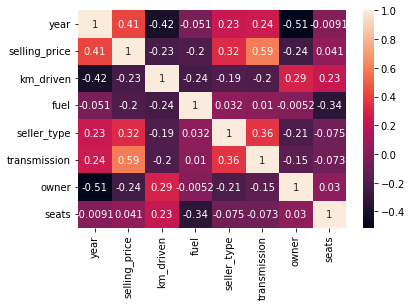

In [25]:
sns.heatmap(df.corr(),annot=True)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   int64  
 5   seller_type    8128 non-null   int64  
 6   transmission   8128 non-null   int64  
 7   owner          8128 non-null   int64  
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(7), object(5)
memory usage: 825.6+ KB


In [27]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,1,1,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,1,1,2,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,1,1,3,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,1,1,1,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,1,1,1,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,1,1,1,18.5,1197,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,1,1,4,16.8,1493,110,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,1,1,1,19.3,1248,73.9,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,0,1,1,1,23.57,1396,70,140Nm@ 1800-3000rpm,5.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   int64  
 5   seller_type    8128 non-null   int64  
 6   transmission   8128 non-null   int64  
 7   owner          8128 non-null   int64  
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(7), object(5)
memory usage: 825.6+ KB


In [29]:
df2=df.name.str.split(pat=' ',expand=True)

In [30]:
df2

,0,1,2,3,4,5,6,7,8,9
0,Maruti,Swift,Dzire,VDI,None,None,None,None,None,None
1,Skoda,Rapid,1.5,TDI,Ambition,None,None,None,None,None
2,Honda,City,2017-2020,EXi,None,None,None,None,None,None
3,Hyundai,i20,Sportz,Diesel,None,None,None,None,None,None
4,Maruti,Swift,VXI,BSIII,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,i20,Magna,None,None,None,None,None,None,None
8124,Hyundai,Verna,CRDi,SX,None,None,None,None,None,None
8125,Maruti,Swift,Dzire,ZDi,None,None,None,None,None,None
8126,Tata,Indigo,CR4,None,None,None,None,None,None,None


In [31]:
df['name']=df2[1]

In [32]:
df['brand']=df2[0]

In [33]:
df3= df[['brand','name','selling_price','km_driven','fuel','seller_type','transmission','transmission','owner','mileage','engine','max_power']]

In [34]:
df3

,brand,name,selling_price,km_driven,fuel,seller_type,transmission,transmission,owner,mileage,engine,max_power
0,Maruti,Swift,450000,145500,0,1,1,1,1,23.4,1248,74
1,Skoda,Rapid,370000,120000,0,1,1,1,2,21.14,1498,103.52
2,Honda,City,158000,140000,1,1,1,1,3,17.7,1497,78
3,Hyundai,i20,225000,127000,0,1,1,1,1,23.0,1396,90
4,Maruti,Swift,130000,120000,1,1,1,1,1,16.1,1298,88.2
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,i20,320000,110000,1,1,1,1,1,18.5,1197,82.85
8124,Hyundai,Verna,135000,119000,0,1,1,1,4,16.8,1493,110
8125,Maruti,Swift,382000,120000,0,1,1,1,1,19.3,1248,73.9
8126,Tata,Indigo,290000,25000,0,1,1,1,1,23.57,1396,70


In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   name           8128 non-null   object
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   int64 
 5   seller_type    8128 non-null   int64 
 6   transmission   8128 non-null   int64 
 7   transmission   8128 non-null   int64 
 8   owner          8128 non-null   int64 
 9   mileage        7907 non-null   object
 10  engine         7907 non-null   object
 11  max_power      7913 non-null   object
dtypes: int64(7), object(5)
memory usage: 762.1+ KB


In [36]:
df3.drop('brand',axis=1,inplace=True)

C:\Users\Rajesh\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   selling_price  8128 non-null   int64 
 2   km_driven      8128 non-null   int64 
 3   fuel           8128 non-null   int64 
 4   seller_type    8128 non-null   int64 
 5   transmission   8128 non-null   int64 
 6   transmission   8128 non-null   int64 
 7   owner          8128 non-null   int64 
 8   mileage        7907 non-null   object
 9   engine         7907 non-null   object
 10  max_power      7913 non-null   object
dtypes: int64(7), object(4)
memory usage: 698.6+ KB


In [38]:
df3.mileage.dropna()

0       23.4 
1       21.14
2       17.7 
3       23.0 
4       16.1 
        ...  
8123    18.5 
8124    16.8 
8125    19.3 
8126    23.57
8127    23.57
Name: mileage, Length: 7907, dtype: object

In [44]:
def preprocessing_input(df):
    df=df.copy()
    
    return df

In [46]:
x=preprocessing_input(df3)

In [47]:
{column:len(x[column].unique()) for column in x.columns}

AttributeError: 'DataFrame' object has no attribute 'unique'